In [19]:
from Read_Binary import main
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File Load

In [20]:
inputfile = '20220210test_2.out'

In [21]:
# Create 4 dataframes:
#  - Tags, which show the measurement information (Number of Records, Resolution etc)
#  - Photon Events
#  - Marker Events
#  - Overflow Events

tags, photondata, markerdata, ovfldata = main(inputfile)
tagsdf = pd.DataFrame(tags)
photondf = pd.DataFrame(photondata)
markerdf = pd.DataFrame(markerdata)
ovfldf = pd.DataFrame(ovfldata)

Progress: 99.9%

# Dataframes

### Tags

In [22]:
tagsdf

,Mode,Records,Resolution,Acquisition Time,Binning,Offset,SyncDivider,SyncLvl,SyncEdge,SyncOffset,...,Chn2Lvl,Chn2Edge,Chn2Offset,Chn3Lvl,Chn3Edge,Chn3Offset,Chn4Lvl,Chn4Edge,Chn4Offset,Header End
0,3,11216255,0.0,100000,6,0,4,-200,0,0,...,-100,0,0,-100,0,0,-100,0,0,True


### Photons

In [23]:
photondf

,recNum,Channel,Real Time,nsync,dtime
0,2,1,0.0,2068,8
1,4,1,0.0,3165,8
2,10,1,0.0,8758,9
3,13,1,0.0,10496,9
4,15,2,0.0,12287,16
...,...,...,...,...,...
3590816,11216244,1,0.0,7808438329,8
3590817,11216247,2,0.0,7808440325,12
3590818,11216248,1,0.0,7808441306,7
3590819,11216250,1,0.0,7808441678,7


### Markers

In [24]:
markerdf

,recNum,Marker,TimeTag



# T2 Analysis

In [ ]:
import time

In [37]:
start = time.time()
N1 = []
N2 = []
N12 = []
N21 = []
ln = int(tagsdf['Records'].values[0])
thresdown = 0
thresup = 50000 
# Maybe try to run this loop on a df with just ch0
for i in range(len(photondf[:ln])):
    elem = photondf.iloc[i]
    if elem.Channel == 1:
        nextelem = photondf.iloc[i+1]
        secelem = photondf.iloc[i+2]
        val10 = int(nextelem.TimeTag - elem.TimeTag)
        val20 = int(secelem.TimeTag - elem.TimeTag)
        val21 = int(secelem.TimeTag - nextelem.TimeTag)
        if nextelem.Channel==2 and thresdown <val10 < thresup:
            if secelem.Channel==3 and thresdown <val21 < thresup:
                N12.append([(int(elem.recNum), int(nextelem.recNum), int(secelem.recNum)), (val10,val20)])
            else:
                N1.append([(int(elem.recNum), int(nextelem.recNum)), (val10)]) 
            
        elif nextelem.Channel==3 and thresdown <val10 < thresup:
            if secelem.Channel==2 and thresdown <val21 < thresup:
                N21.append([(int(elem.recNum), int(nextelem.recNum), int(secelem.recNum)), (val10,val20)])
            else:
                N2.append([(int(elem.recNum), int(nextelem.recNum)), (val10)]) 
        else:
            continue
    else:
            continue
            
end=time.time()
print(str(round(end - start)) + ' seconds')

IndexError: single positional indexer is out-of-bounds

In [ ]:
n1dt = [n[1] for n in N1]
n2dt = [n[1] for n in N2]
n12dt = [n[1] for n in N12]
n21dt = [n[1] for n in N21]

In [ ]:
plt.scatter(np.arange(len(n1dt)),n1dt)

In [38]:
plt.scatter(np.arange(len(n2dt)),n2dt)

NameError: name 'n2dt' is not defined

In [39]:
n12dt_arng = [[n[0] for n in n12dt],[n[1] for n in n12dt]]
plt.scatter(np.arange(len(n12dt)),n12dt_arng[0])
plt.scatter(np.arange(len(n12dt)),n12dt_arng[1])

NameError: name 'n12dt' is not defined

In [40]:
n21dt_arng = [[n[0] for n in n21dt],[n[1] for n in n21dt]]
plt.scatter(np.arange(len(n21dt)),n21dt_arng[0])
plt.scatter(np.arange(len(n21dt)),n21dt_arng[1])

NameError: name 'n21dt' is not defined

In [41]:
all_delays = [[photondf.TimeTag[:-1].iloc[i+1]-photondf.TimeTag[:-1].iloc[i]] for i in range(len(photondf.TimeTag[:1000]))]

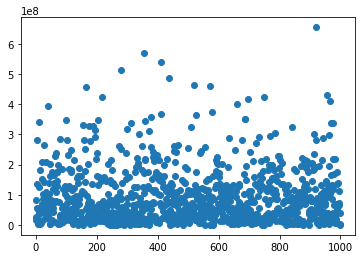

In [195]:
plt.scatter(np.arange(len(all_delays)),all_delays)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

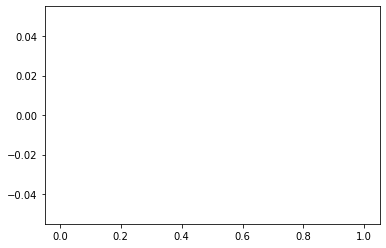

In [196]:
plt.hist(n2dt, bins=15)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([11225. , 12917.8, 14610.6, 16303.4, 17996.2, 19689. , 21381.8,
        23074.6, 24767.4, 26460.2, 28153. , 29845.8, 31538.6, 33231.4,
        34924.2, 36617. ]),
 <BarContainer object of 15 artists>)

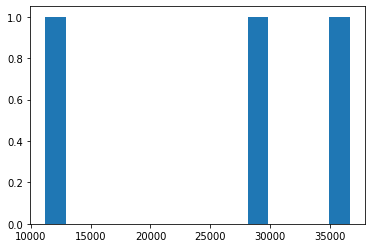

In [197]:
plt.hist(n1dt, bins=15)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 2 BarContainer objects>)

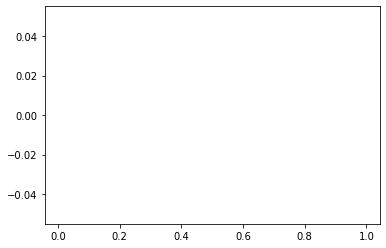

In [198]:
plt.hist(n12dt_arng, bins=15)

In [2]:
plt.hist(n21dt_arng, bins=15)

NameError: name 'n21dt_arng' is not defined

# T3 Analysis

In [25]:
ch1df = photondf[photondf['Channel']==0]
ch2df = photondf[photondf['Channel']==1]
ch3df = photondf[photondf['Channel']==2]

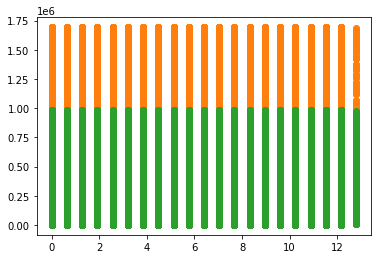

In [26]:
plt.scatter(ch1df['dtime']*0.64,np.arange(0, len(ch1df)),)
plt.scatter(ch2df['dtime']*0.64,np.arange(0, len(ch2df)),)
plt.scatter(ch3df['dtime']*0.64,np.arange(0, len(ch3df)),)

(array([9.33000e+03, 6.11600e+03, 5.54300e+03, 5.51200e+03, 0.00000e+00,
        5.42500e+03, 5.41000e+03, 5.32200e+03, 5.45600e+03, 0.00000e+00,
        5.78300e+03, 5.70700e+03, 5.54800e+03, 5.31700e+03, 0.00000e+00,
        5.39800e+03, 5.40400e+03, 5.45000e+03, 5.41600e+03, 0.00000e+00,
        2.38151e+05, 4.28753e+05, 1.90772e+05, 3.05440e+04, 3.15000e+02]),
 array([ 0.   ,  0.512,  1.024,  1.536,  2.048,  2.56 ,  3.072,  3.584,
         4.096,  4.608,  5.12 ,  5.632,  6.144,  6.656,  7.168,  7.68 ,
         8.192,  8.704,  9.216,  9.728, 10.24 , 10.752, 11.264, 11.776,
        12.288, 12.8  ]),
 <BarContainer object of 25 artists>)

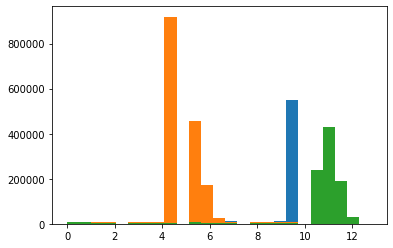

In [27]:
plt.hist(ch1df['dtime']*0.64, bins=25)
plt.hist(ch2df['dtime']*0.64, bins=25)
plt.hist(ch3df['dtime']*0.64, bins=25)

In [28]:
ch2df.head()

,recNum,Channel,Real Time,nsync,dtime
0,2,1,0.0,2068,8
1,4,1,0.0,3165,8
2,10,1,0.0,8758,9
3,13,1,0.0,10496,9
5,18,1,0.0,13790,9


In [29]:
ch3df.head()

,recNum,Channel,Real Time,nsync,dtime
4,15,2,0.0,12287,16
6,22,2,0.0,17013,9
10,38,2,0.0,28803,17
13,48,2,0.0,36624,17
20,67,2,0.0,48938,17


In [30]:
def func(syncdf, df, trgdel = 13*(10**-9), res = 10**-11):
    import sys
    s = sys.stdout
    chpos= 0
    val = []
    for i in range(len(syncdf)-1):
        # s.write('\rProgress: %.1f%%' % round(i/(len(syncdf)-1)*100,1))
        sync0_i = syncdf.nsync.iloc[i]
        sync0_f = syncdf.nsync.iloc[i+1]
        dtime0 = syncdf.dtime.iloc[i]
        try:
            dtime1 = df.dtime.iloc[chpos]
            sync1 = df.nsync.iloc[chpos]
            while sync1<sync0_i:
                chpos+=1
                sync1 = df.nsync.iloc[chpos]
            if sync1<sync0_f:
                # val.append((sync1 - sync0_i)*trgdel + (dtime0-dtime1)*res)
                val.append(sync1 - sync0_i)
                chpos += 1
                # s.flush()
            else:
                # s.flush()
                continue
                    
        except:
            return val
    return val

In [31]:
vals21 = func(ch2df, ch1df)

In [32]:
vals23 = func(ch2df, ch3df)

(array([9914., 9213., 9123., 8970., 8763., 8791., 8645., 8653., 8264.,
        8340., 8090., 7856., 7938., 7892., 7609., 7309., 7177., 7274.,
        6990., 7049., 6745., 6632., 6652., 6699., 6430., 6211., 6287.,
        5966., 6024., 5617., 5864., 5732., 5611., 5543., 5398., 5251.,
        5285., 5268., 5189., 4888., 4959., 4782., 4803., 4725., 4622.,
        4494., 4376., 4373., 4248., 4217., 4203., 4104., 4021., 3892.,
        3937., 3661., 3836., 3639., 3643., 3581., 3647., 3324., 3379.,
        3436., 3356., 3228., 3185., 3149., 3049., 2977., 2992., 2946.,
        2912., 2929., 2711., 2750., 2712., 2629., 2641., 2612., 2573.,
        2513., 2470., 2465., 2508., 2335., 2268., 2264., 2199., 2181.,
        2195., 2192., 2026., 2045., 2001., 2011., 1917., 1944., 1918.,
        1897., 1904., 1859., 1826., 1714., 1774., 1702., 1657., 1599.,
        1622., 1550., 1610., 1504., 1514., 1422., 1429., 1440., 1407.,
        1277., 1328., 1396., 1263., 1301., 1290., 1212., 1222., 1221.,
      

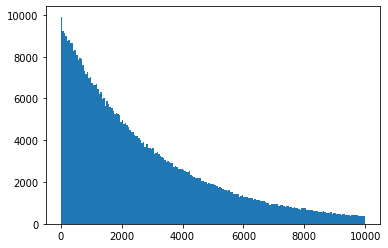

In [60]:
plt.hist(vals21,bins=200, range=(0,10000))